# Machine Learning CA1 : Customer Services

For this project a dataset from the Maven Churn Challenge (ref####), which contains all customer information from a telecommunications company based in California for the second quarter of 2022. The data set contains information about the clients, what packages they purchased, and whether they churned or stayed.\
Loyal long term customers are important in telecommunications businesses, as the cost of retaining customers is much less than the aquisition cost of new customers.\
Because of the value the company gains from retaining customers, the aim of this project is to create a Machine Learning (ML) model to predict if a customer will stay with the company or churn based on features that the company collects, which are present in our data set. This model can then be used on future customer data to determine the likelihood of current customers churning, which will help the company retain more customers.\
The data set used in this project contains information on 7043 customers regarding their demographic, subscription services, payment types and customer status (churned, joined, stayed).\
The data set contains numerical and categorical data.\
Three ML models will be used: Support Vector Machine(SVM), Decision Trees(DT), and Artificial Neural Network(ANN)

## Preparation
The first cell in this project will be used to import modules that will be required in the project.\
Jupyter is configured to not have a maximum limit on rows and columns, and the dataframe is then loaded into a variable *df*.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn import tree

%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df=pd.read_csv("telecom_customer_churn.csv")

# Data Preperation

## Descriptive analysis

The project is begun by first getting an accurate description of the data set, the number of columns and rows, the number of uniquevalues, null values, and data types.\
From this, it can be seen that the original dataset contains 7043 rows and 38 columns.\
The features of the columns can be grouped into four groups: 

**1) Customer's demographics:**
- CustomerID: An ID that is unique for each customer
- Gender: The customer's gender (Male, Female)
- Age: The age of the customer at the end of the fiscal quarter
- Married: Marriage status of the customer (yes, no)
- Number of Dependents: Indicates the number of dependents that live with the customer
- City: The city of the customer's primary residence.
- Zip Code: The zip code of the customer's primary residence
- Latitude: The latitude of the customer's primary residence
- Longitude: The longitude of the customer's primary residence
- Number of Referrals: Indicates the number of times the customer has referred a friend or family member to this company to date
- Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified

**2) Customer's subscription services details:**
- Offer: Identifies the last marketing offer that the customer accepted (None, Offer A, Offer B, Offer C, Offer D, Offer E)
- Phone Service: Indicates if the customer subscribes to home phone service with the company (Yes, No)
- Avg Monthly Long Distance Charges: The customer's average long distance charges
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company (Yes, No)
- Internet Service: Indicates if the customer subscribes to Internet service with the company (Yes, No)
- Internet Type: Indicates the customer's type of internet connection (DSL, Fiber Optic, Cable)
- Avg Monthly GB Download: The customer's average download volume (in gigabytes)
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company (Yes, No)
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No)
- Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment
- Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider at no additional fee (Yes, No)
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee (Yes, No)
- Streaming Music: Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee (Yes, No)

**3) Customer's charges details:**
- Contract: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year
- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer's current total monthly charge for all their services from the company
- Total Charges: Indicates the customer's total charges, calculated to the end of the quarter specified above
- Total Refunds: Indicates the customer's total refunds, calculated to the end of the quarter specified above
- Total Extra Data Charges: Indicates the customer's total charges for extra data downloads above those specified in their plan
- Total Long Distance Charges: Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter
- Total Revenue: Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above

**4) Customer's churn details:**
- Customer Status: Indicates the status of the customer at the end of the quarter (Churned, Stayed, Joined)
- Churn category: A high-level category for the customer's reason for churning, which is asked when they leave the company
- Churn reason: A customer's specific reason for leaving the company, which is asked when they leave the company

In [4]:
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.shape

(7043, 38)

In [6]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [7]:
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                  

## Correlation
A seaborn heat map is generated to allow us to determine if any immediate correlations can be seen. Initially only a handful of correlations can be seen, most of which are to be expected (e.g. negative correlations between age and internet use). The other prevelant correlations are related to various types of charges and total revenue. There is also strong (negative) correlation between zip code, longitude and latitude, however since these are geographical components their relationship is not of immediate concern.

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.025141,0.009927,-0.020010,-0.566518,0.134511,0.059684,0.024168,0.025036,0.003065,0.048265
Number of Dependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,0.278003,0.108237,-0.002898,0.300802,-0.125649,0.022535,0.014023,-0.014436,0.068966,0.038038
Zip Code,-0.008183,0.016493,1.000000,0.894769,-0.790564,0.001463,0.007146,0.012298,-0.002859,-0.002517,0.001978,-0.003797,-0.014550,0.005063,0.002944
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,0.018715,0.011963,0.014450,-0.013485,-0.021613,-0.002784,-0.009901,-0.013233,0.008029,0.000082
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,-0.009893,-0.009672,-0.015420,0.015195,0.021052,0.003811,-0.000597,0.010461,-0.006923,0.001062
Number of Referrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,1.000000,0.326975,0.001800,0.080243,0.026301,0.250378,0.024756,0.000350,0.216190,0.261853
Tenure in Months,0.009927,0.108237,0.007146,0.011963,-0.009672,0.326975,1.000000,0.012713,0.038173,0.239065,0.826074,0.059021,0.082266,0.674149,0.853146
Avg Monthly Long Distance Charges,-0.020010,-0.002898,0.012298,0.014450,-0.015420,0.001800,0.012713,1.000000,0.019047,0.019149,0.016946,-0.026072,0.021162,0.548759,0.173072
Avg Monthly GB Download,-0.566518,0.300802,-0.002859,-0.013485,0.015195,0.080243,0.038173,0.019047,1.000000,-0.017283,0.031957,-0.011000,0.015451,0.024101,0.031922
Monthly Charge,0.134511,-0.125649,-0.002517,-0.021613,0.021052,0.026301,0.239065,0.019149,-0.017283,1.000000,0.622810,0.023963,0.121238,0.235685,0.563249


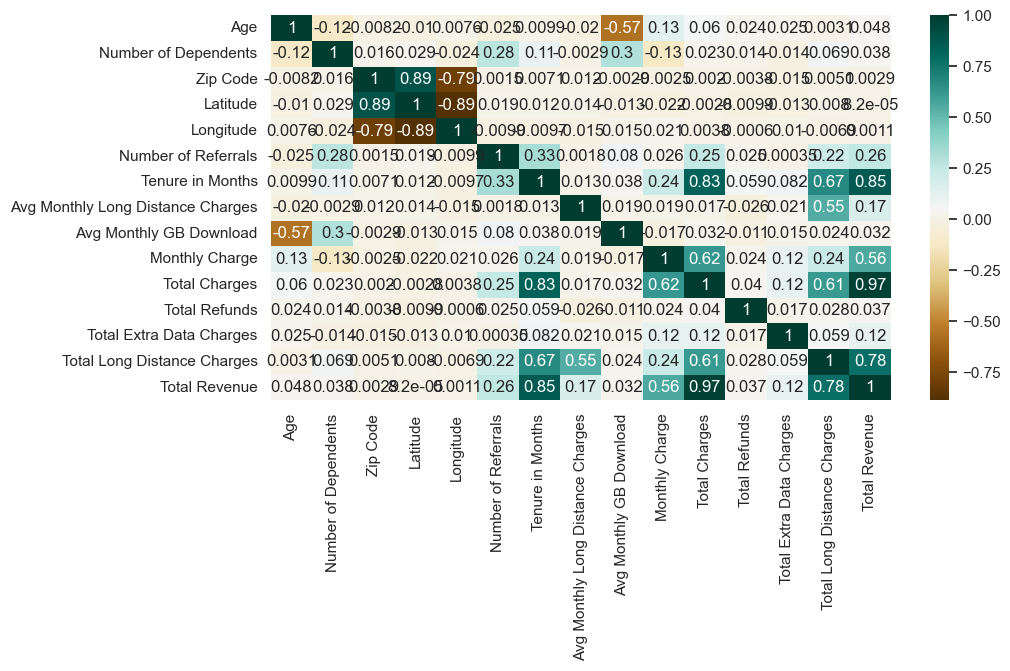

In [8]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Financial Effect

Next, the information for the "total revenue" column is analysed to determine the financial effect churned customers have. In the second quarter of 2022, the total revenue the company had was 21.37 million dollars. Of that, only 0.25% were new customers and 17.24% were churned customers. That means that company lost 3.68 million dollars in the second quarter of 2022 as a result of not being able to retain those customers. The rate of customer churns that quarter was 26.54%, of which the main reason for leaving (623 customers) was due to competitors offering better plans and devices.\
Another cause of churn that is of important note is dissatisfaction with the attitude of the company's customer support team.\
The model that will be developed in this project can be used on customer data to determine predicted Customer churn and Revenue loss in future quarters, unless the company takes active actions to retain customers that are likely to churn.\

In [9]:
df["Customer Status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

<AxesSubplot:xlabel='Customer Status', ylabel='count'>

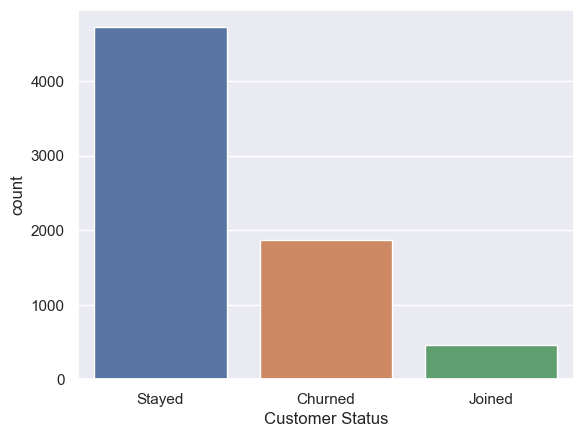

In [10]:
sns.countplot(x="Customer Status",data = df)

In [11]:
df.groupby(["Customer Status"])["Total Revenue"].sum()

Customer Status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: Total Revenue, dtype: float64

Text(0.5, 1.0, 'Total revenue by Customer status (%)')

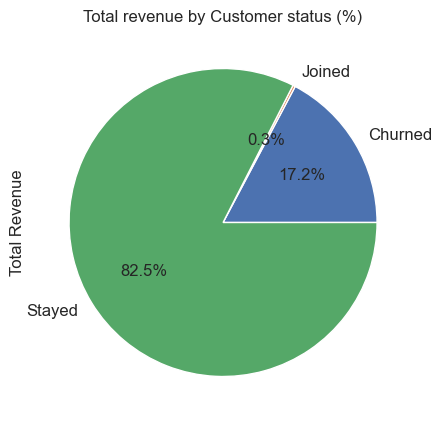

In [12]:
df_revenue = df.groupby(["Customer Status"])["Total Revenue"].sum()
df_revenue.plot.pie(autopct="%1.1f%%",figsize=(5,5),textprops={'fontsize': 12})
plt.title('Total revenue by Customer status (%)')

In [13]:
df_churned= df[df["Customer Status"] == "Churned"] 
df_churned.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
18,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,0,45,None,Yes,10.67,No,Yes,DSL,17.0,Yes,No,Yes,No,No,Yes,No,Yes,One Year,No,Credit Card,62.7,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.1,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer


In [14]:
df_churned["Churn Category"].value_counts()

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: Churn Category, dtype: int64

<AxesSubplot:>

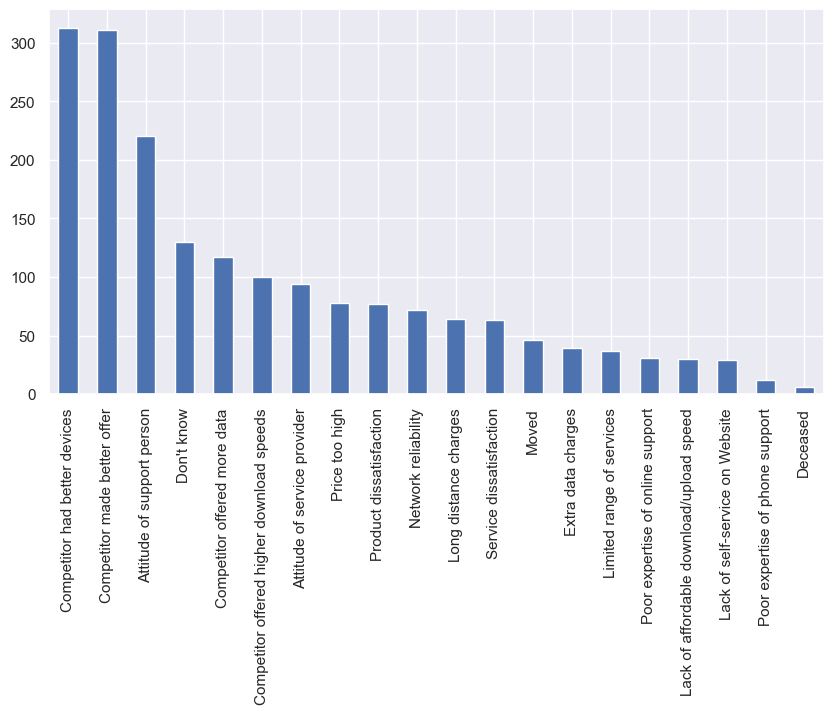

In [15]:
df_churned["Churn Reason"].value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
#plt.title("Number of cars by make")
#plt.ylabel("Number of cars")
#plt.xlabel("Make");

In [16]:
df_churned["Churn Reason"].value_counts()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn Reason, 

## Selecting Relevant Columns

Several columns will be dropped from our dataset, as they are irrelevant to the analysis. These include:
- Customer ID: Identifier unique to each customer, has no impact on the customer directly
- Latitude, Longitude, Zip Code: They are all related to the city the customer is registered in, and since these features are highly correlated with the city, they can be removed while keeping the city feature without hurting our model.
- Churn Category, Churn Reason: these features reflect feedback from the customers after they left and were already analysed above. For the Machine Learning purposes of this project, the reason and category of churning can be removed.
- Customer Status (Joined): Similarly to the last two features, joined customers are another category that we are uninterested in for the purposes of this Machine Learning project, as we are looking at the initial period of contracts, so the rows containing 'joined' customers will be removed. (fix ref: https://amit-timalsina.medium.com/what-are-the-best-ways-to-do-feature-engineering-of-city-name-2dc60f76ab20)

In [17]:
df = df[df["Customer Status"].str.contains("Joined") == False]
df1=df.drop(["Customer ID","Latitude", "Longitude", "Zip Code", "Churn Category", "Churn Reason"],axis=1)

df1.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


## Data cleaning: Duplicates
First we check for any duplicate data that may be present. It can be seen that no duplicate rows are present in this data set, so we can move on to the next step.

In [18]:
df1.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [19]:
df1.duplicated().sum()

0

## Investigating Null Values

There are three distinct groups of null values present in our dataset:
- Avg Monthly Long Distance Charges, Multiple Lines: both of these features have 682 missing values. These are all related to the 'no' value in the Phone Service column, as neither of these two features are possible without Phone service being 'yes', and all of our missing values do not have phone service, the missing values in these two columns will be replaced with '0' or 'no' for Avg Monthly Long Distance Charges and multiple lines, respectively.
- Internet Service Dependancies: There are 10 columns with 1526 missing values. These columns include Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, and Unlimited Data, which are all dependant on Internet Service. For all of the missing values present, the internet service value is 'no', therefore, all the missing values can be replaced with '0', 'no' or 'no Internet', depending on the data type (float, boolean, category).
- Churn Reason and Churn Category: These two fatures have 5174 missing values each, and are also present only when the status of the customer is 'joined' or 'stayed'. As a result, all missing values for these two features will be replaced with "Not Churned". However, as we are removing these columns, this step can be seen as a data preperation formality as opposed to a necessity for the model.

In [20]:
df1.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                       1344
Contract                                0
Paperless Billing                 

In [21]:
100*df1.isnull().sum()/len(df1)

Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                 0.000000
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.773866
Multiple Lines                        9.773866
Internet Service                      0.000000
Internet Type                        20.397632
Avg Monthly GB Download              20.397632
Online Security                      20.397632
Online Backup                        20.397632
Device Protection Plan               20.397632
Premium Tech Support                 20.397632
Streaming TV                         20.397632
Streaming Movies                     20.397632
Streaming Music                      20.397632
Unlimited Dat

In [22]:
dfnoservice = df1[df1["Phone Service"]=="No"] 

dfnoservice.isnull().sum()

Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
City                                   0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    644
Multiple Lines                       644
Internet Service                       0
Internet Type                          0
Avg Monthly GB Download                0
Online Security                        0
Online Backup                          0
Device Protection Plan                 0
Premium Tech Support                   0
Streaming TV                           0
Streaming Movies                       0
Streaming Music                        0
Unlimited Data                         0
Contract                               0
Paperless Billing                      0
Payment Method  

In [23]:
df1["Avg Monthly Long Distance Charges"]=df["Avg Monthly Long Distance Charges"].fillna(0)
df1["Multiple Lines"]=df["Multiple Lines"].fillna("No")
df1["Internet Type"]=df["Internet Type"].fillna("No internet")

In [24]:
df1["Avg Monthly Long Distance Charges"]=df1["Avg Monthly Long Distance Charges"].astype(float)

In [25]:
dfnoservice = df1[df1["Internet Service"]=="No"] 
dfnoservice.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                       1344
Contract                                0
Paperless Billing                 

In [26]:
df1["Avg Monthly GB Download"]=df["Avg Monthly GB Download"].fillna("0")
df1["Online Security"]=df["Online Security"].fillna("No")
df1["Online Backup"]=df["Online Backup"].fillna("No")
df1["Device Protection Plan"]=df["Device Protection Plan"].fillna("No")
df1["Premium Tech Support"]=df["Premium Tech Support"].fillna("No")
df1["Streaming TV"]=df["Streaming TV"].fillna("No")
df1["Streaming Movies"]=df["Streaming Movies"].fillna("No")
df1["Streaming Music"]=df["Streaming Music"].fillna("No")
df1["Unlimited Data"]=df["Unlimited Data"].fillna("No")

In [27]:
df1["Avg Monthly GB Download"]=df1["Avg Monthly GB Download"].astype(float)

In [28]:
df1.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract  

In [29]:
df1.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

In [30]:
df1.nunique()

Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3452
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                 

In [31]:
df1.head(5)

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


Next, the boolean values will be converted from string to a '0' or '1' format.

In [32]:
df1.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract  

In [33]:
# we want to "predict churns", so I set up Churned=1, stayed=0, 
# if we wanted to "predict retention", then stayed should be 1, and churned 0

df2=df1

df2['Customer Status'].replace('Stayed', 0, inplace = True)
df2['Customer Status'].replace('Churned', 1, inplace = True)

df2['Gender'].replace('Female', 1, inplace = True)
df2['Gender'].replace('Male', 0, inplace = True)

df2['Married'].replace('Yes', 1, inplace = True)
df2['Married'].replace('No', 0, inplace = True)

df2['Phone Service'].replace('Yes', 1, inplace = True)
df2['Phone Service'].replace('No', 0, inplace = True)

df2['Multiple Lines'].replace('Yes', 1, inplace = True)
df2['Multiple Lines'].replace('No', 0, inplace = True)

df2['Internet Service'].replace('Yes', 1, inplace = True)
df2['Internet Service'].replace('No', 0, inplace = True)

df2['Online Security'].replace('Yes', 1, inplace = True)
df2['Online Security'].replace('No', 0, inplace = True)

df2['Online Backup'].replace('Yes', 1, inplace = True)
df2['Online Backup'].replace('No', 0, inplace = True)

df2['Device Protection Plan'].replace('Yes', 1, inplace = True)
df2['Device Protection Plan'].replace('No', 0, inplace = True)

df2['Premium Tech Support'].replace('Yes', 1, inplace = True)
df2['Premium Tech Support'].replace('No', 0, inplace = True)

df2['Streaming TV'].replace('Yes', 1, inplace = True)
df2['Streaming TV'].replace('No', 0, inplace = True)

df2['Streaming Movies'].replace('Yes', 1, inplace = True)
df2['Streaming Movies'].replace('No', 0, inplace = True)

df2['Streaming Music'].replace('Yes', 1, inplace = True)
df2['Streaming Music'].replace('No', 0, inplace = True)

df2['Unlimited Data'].replace('Yes', 1, inplace = True)
df2['Unlimited Data'].replace('No', 0, inplace = True)

df2['Paperless Billing'].replace('Yes', 1, inplace = True)
df2['Paperless Billing'].replace('No', 0, inplace = True)

In [34]:
df2.dtypes

Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
City                                  object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Contract  

In [35]:
df2.head(5)

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,1,37,1,0,Frazier Park,2,9,None,1,42.39,0,1,Cable,16.0,0,1,0,1,1,0,0,1,One Year,1,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,0,46,0,0,Glendale,0,9,None,1,10.69,1,1,Cable,10.0,0,0,0,0,0,1,1,0,Month-to-Month,0,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,0,50,0,0,Costa Mesa,0,4,Offer E,1,33.65,0,1,Fiber Optic,30.0,0,0,1,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,0,78,1,0,Martinez,1,13,Offer D,1,27.82,0,1,Fiber Optic,4.0,0,1,1,0,1,1,0,1,Month-to-Month,1,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,1,75,1,0,Camarillo,3,3,None,1,7.38,0,1,Fiber Optic,11.0,0,0,0,1,1,0,0,1,Month-to-Month,1,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


## Investigating outliers

Next we will determine if any outliers are present. This is done by comparing the maximum and mean values of each row. Using this process, only two rows stand out: Number of referrals and Total revenue. As these are all customer dependant, it is not unexpected that certain customers would spend much more than the mean, or referr more people than the mean. As a result, these outliers will not be removed.

In [36]:
df2.describe()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,0.497344,46.760510,0.503567,0.476097,2.020944,34.499772,0.902261,23.004277,0.444073,0.796024,20.876461,0.299438,0.360449,0.362726,0.303081,0.403400,0.407194,0.369707,0.686144,0.603126,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082,0.283655
std,0.500031,16.841362,0.500025,0.968499,3.024016,23.968734,0.296983,15.466844,0.496900,0.402982,20.406247,0.458047,0.480167,0.480823,0.459625,0.490617,0.491349,0.482762,0.464094,0.489286,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036,0.450805
min,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000,0.000000
25%,0.000000,33.000000,0.000000,0.000000,0.000000,12.000000,1.000000,9.250000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000,0.000000
50%,0.000000,46.000000,1.000000,0.000000,0.000000,32.000000,1.000000,22.920000,0.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000,0.000000
75%,1.000000,60.000000,1.000000,0.000000,3.000000,57.000000,1.000000,36.440000,1.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000,1.000000
max,1.000000,80.000000,1.000000,9.000000,11.000000,72.000000,1.000000,49.990000,1.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,1.000000


<AxesSubplot:xlabel='Number of Referrals'>

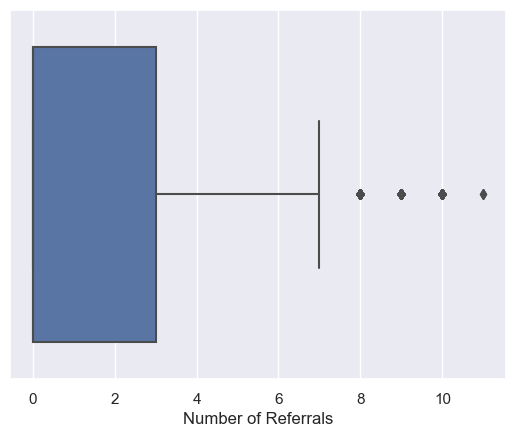

In [37]:
sns.boxplot(x=df2["Number of Referrals"])

<AxesSubplot:xlabel='Total Revenue'>

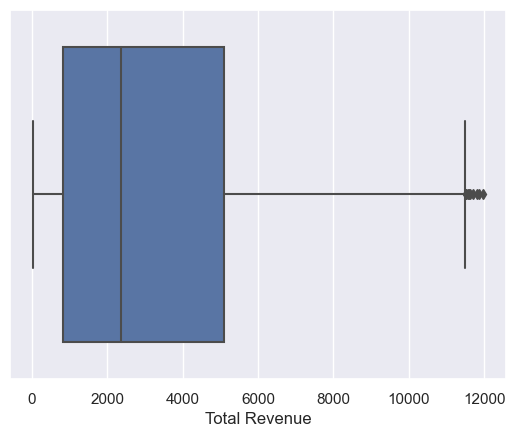

In [38]:
sns.boxplot(x=df2["Total Revenue"])

## Data Cleaning: Results
The data set has now been cleaned and is almost ready for machine learning. The dataset now has 6589 rows and 32 columns and is stored in the variable *df2*. Both of these satisfy the project requirments, which are a minimum of 5000 rows and 10 columns. The last step of data preperation left is encoding the categorical data.

In [39]:
df2.shape

(6589, 32)

## Encoding the Dataset

Before encoding the dataset, it will be split into two smaller datasets, *X* which will hold all the independent features, and *y* which will hold our dependent feature, which is the churn status.\
To improve our chances of achieving high accuracy and improve processing times, two encoding methods will be used. The first method used will be Leave One Out Encoding (LOOE) and it will be used only on the city column, while the rest of the data is encoded using one-hot encoding.\
The reason we use LOOE on the city column is due to the large number of unique values this feature contains. There are 1106 unique cities, and if one-hot were used on this feature it would result in 1105 new columns being created in our dataset, and would increase the dimensions of this dataset by a factor of 35! It would also cause the data to become very sparse, as each row would now have 1105 new zero values. This would also emphasise one of the drawbacks of the 'Curse of Dimensionality', where for each new feature added to a data set the time taken for computation increases exponentially. The LOOE method only creates one new column and replaces categorical values with the mean of the target variable in a similar way to Target Encoding while excluding the row's target in the calculation to reduce overfitting.\
The other method that will be used is one-hot encoding. The reason that a second encoding method is used is because the LOOE is prone to bias, due to including target variable in its computation. To avoid this, and due to the rest of the categoric features having a small amount of unique values, one-hot encoding can be used with all other features, while not drastically increasing the number of features in the dataset. The one-hot encoding will be done by using the get_dummies pandas function to create a new column for each unique categorical value in our target frames and remove the original feature (Pramoditha, 2021).\

ref: https://contrib.scikit-learn.org/category_encoders/leaveoneout.html#category_encoders.leave_one_out.LeaveOneOutEncoder 

ref2:https://towardsdatascience.com/4-categorical-encoding-concepts-to-know-for-data-scientists-e144851c6383

ref3(1hot):(Pramoditha, 2021)

In [40]:
df2.shape

(6589, 32)

In [41]:
X = df2.iloc[:,0:31]
y = df2.iloc[:,31]

#X.head()

In [42]:
X_encoded2 = X
y_encoded2 = y

In [43]:
import category_encoders as ce

In [44]:
encoder=ce.LeaveOneOutEncoder(return_df=True)
X_city_looe = encoder.fit_transform(X_encoded2["City"],y_encoded2)

X_city_looe.shape

(6589, 1)

In [45]:
X_city_looe.head(5)

,City
0,0.142857
1,0.393939
2,0.285714
3,0.333333
4,0.428571


In [46]:
#Replacing the City column with the LOOE encoded one
X_encoded2=X_city_looe.join(X_encoded2.drop("City",axis=1))
X_encoded2.head(5)

,City,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0.142857,1,37,1,0,2,9,None,1,42.39,0,1,Cable,16.0,0,1,0,1,1,0,0,1,One Year,1,Credit Card,65.6,593.30,0.00,0,381.51,974.81
1,0.393939,0,46,0,0,0,9,None,1,10.69,1,1,Cable,10.0,0,0,0,0,0,1,1,0,Month-to-Month,0,Credit Card,-4.0,542.40,38.33,10,96.21,610.28
2,0.285714,0,50,0,0,0,4,Offer E,1,33.65,0,1,Fiber Optic,30.0,0,0,1,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45
3,0.333333,0,78,1,0,1,13,Offer D,1,27.82,0,1,Fiber Optic,4.0,0,1,1,0,1,1,0,1,Month-to-Month,1,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51
4,0.428571,1,75,1,0,3,3,None,1,7.38,0,1,Fiber Optic,11.0,0,0,0,1,1,0,0,1,Month-to-Month,1,Credit Card,83.9,267.40,0.00,0,22.14,289.54


In [47]:
X_encoded2.dtypes

City                                 float64
Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Contract  

In [48]:
X_encoded2 = pd.get_dummies(X_encoded2)

In [49]:
X_encoded2.shape

(6589, 43)

In [50]:
y_encoded2.shape

(6589,)

In [51]:
X_encoded2.head(5)

,City,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No internet,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.142857,1,37,1,0,2,9,1,42.39,0,1,16.0,0,1,0,1,1,0,0,1,1,65.6,593.30,0.00,0,381.51,974.81,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0.393939,0,46,0,0,0,9,1,10.69,1,1,10.0,0,0,0,0,0,1,1,0,0,-4.0,542.40,38.33,10,96.21,610.28,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0.285714,0,50,0,0,0,4,1,33.65,0,1,30.0,0,0,1,0,0,0,0,1,1,73.9,280.85,0.00,0,134.60,415.45,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
3,0.333333,0,78,1,0,1,13,1,27.82,0,1,4.0,0,1,1,0,1,1,0,1,1,98.0,1237.85,0.00,0,361.66,1599.51,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
4,0.428571,1,75,1,0,3,3,1,7.38,0,1,11.0,0,0,0,1,1,0,0,1,1,83.9,267.40,0.00,0,22.14,289.54,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0


## Data Visualisation

A new heat map can now be generated with the cleaned dataset to allow for a closer inspection to any correlations present. We will look in more detail into Top3 positive and Top3 negative correlation values associated with churn status.\
The most positively associated features are contracts that are month-to-month based (0.5), Offer E (0.28), and Internet Fiber Optic (0.27). Customers that are on month-to-month have a high likelyhood of leaving the company as there is no long term contract bounding them to the company, this correlation is expected. Company Offer E also displays correlation with leaving the company, and as it is unknown to us what is specific to this offer, it cannot be directly inferred as to whether or not this should be expected. Internet Fiber Optic being correlated to customers churning is a concerning observation, and can be addressed by analysing the connection speed and avaliablility and comparing it with the competition.\
On the other hand, the tenure in months, two tear contract types, and the number of referrals all have negative correlation to customer churns. They are within 0.12 magnitude of each other, however the most dominant is the tenure in months. This would be expected, since the longer a client is with a company the more likely they are to stay with them. The length of the contract being much more than the fiscal quarter are unlikely to leave, and the number of referrals also indicates the satisfaction of the customer which is unlikely to leave.

ref:https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [52]:
df_encoded2=X_encoded2.join(y_encoded2)

,City,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No internet,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Customer Status
City,1.000000,0.005308,0.000578,-0.015245,-0.016313,-0.037560,-0.052683,0.008643,-0.007760,0.023352,0.041365,0.032120,-0.023587,-0.012742,-0.005924,-0.015910,0.012398,0.009541,0.005227,0.025934,0.024006,0.031507,-0.015846,-0.001968,0.000689,-0.030967,-0.021826,-0.000228,-0.008346,-0.026162,0.003386,0.012956,0.021976,0.001063,-0.015181,0.045767,-0.041365,0.050742,-0.030345,-0.027899,0.033893,-0.039873,0.011595,0.111339
Gender,0.005308,1.000000,-0.007664,-0.004971,-0.006321,0.004353,-0.011547,0.010518,-0.008514,0.004748,0.002584,0.013892,0.017059,0.009362,0.001482,0.012419,0.003749,0.011507,0.008470,-0.000976,0.010891,0.017288,-0.004251,-0.008031,0.000064,-0.015564,-0.008006,0.018020,-0.019836,0.008432,-0.024237,-0.006744,0.004824,0.008537,-0.014655,0.009035,-0.002584,0.005772,-0.008596,0.001647,0.005451,-0.007691,0.004661,0.006373
Age,0.000578,-0.007664,1.000000,-0.014409,-0.125500,-0.032019,-0.009574,0.007853,-0.009553,0.098179,0.110758,-0.389419,-0.046073,0.028884,0.020439,-0.052058,0.053212,0.066303,-0.170316,0.079114,0.100351,0.124422,0.047788,0.020570,0.021759,-0.009976,0.035080,0.045972,-0.022913,-0.031078,0.022459,-0.030179,-0.010853,-0.041248,-0.056854,0.164900,-0.110758,-0.001283,-0.010480,0.011245,0.114948,-0.101897,-0.033586,0.111174
Married,-0.015245,-0.004971,-0.014409,1.000000,0.322628,0.663598,0.359737,0.023813,0.007766,0.123751,-0.021248,0.048629,0.132193,0.125829,0.136040,0.109226,0.104890,0.098809,0.071881,0.001554,-0.032990,0.070009,0.296830,0.031884,0.012018,0.243303,0.308360,-0.002337,0.165664,0.091821,-0.014969,-0.078115,-0.162318,0.006825,0.003602,-0.024714,0.021248,-0.252296,0.069478,0.214997,-0.003856,0.033121,-0.063845,-0.183273
Number of Dependents,-0.016313,-0.006321,-0.125500,0.322628,1.000000,0.276880,0.107311,-0.008652,-0.009199,-0.035975,-0.164563,0.129411,0.036838,-0.005134,-0.024079,0.019176,-0.059247,-0.074119,-0.039533,-0.122734,-0.112755,-0.136297,0.016118,0.012211,-0.015797,0.065869,0.032315,-0.005350,0.033963,0.020228,0.011883,0.015442,-0.069783,0.006085,0.010465,-0.146269,0.164563,-0.128389,0.004264,0.138544,-0.089444,0.099719,-0.018555,-0.232525
Number of Referrals,-0.037560,0.004353,-0.032019,0.663598,0.276880,1.000000,0.323826,0.012590,0.003205,0.067451,-0.051425,0.034329,0.137056,0.104668,0.108669,0.104969,0.067456,0.046462,0.042108,-0.016082,-0.056960,0.011015,0.241943,0.020372,-0.002547,0.207028,0.253851,-0.013343,0.148949,0.093430,-0.013572,-0.064734,-0.144432,0.009476,0.027511,-0.071243,0.051425,-0.272251,0.066514,0.239930,-0.053171,0.077497,-0.050879,-0.312118
Tenure in Months,-0.052683,-0.011547,-0.009574,0.359737,0.107311,0.323826,1.000000,0.013282,0.011992,0.299944,-0.000288,0.029280,0.315726,0.346104,0.336471,0.312314,0.250346,0.256411,0.211155,-0.002435,-0.024360,0.199019,0.812795,0.042729,0.071224,0.653170,0.840935,-0.028353,0.433573,0.297477,-0.040440,-0.245402,-0.410290,-0.005228,0.016244,-0.010669,0.000288,-0.614856,0.168878,0.524372,-0.025183,0.084859,-0.129430,-0.433759
Phone Service,0.008643,0.010518,0.007853,0.023813,-0.008652,0.012590,0.013282,1.000000,0.489561,0.294161,-0.166607,-0.097471,-0.097259,-0.048827,-0.073776,-0.093205,-0.024180,-0.034085,-0.040135,-0.116875,0.012967,0.243944,0.123390,0.0

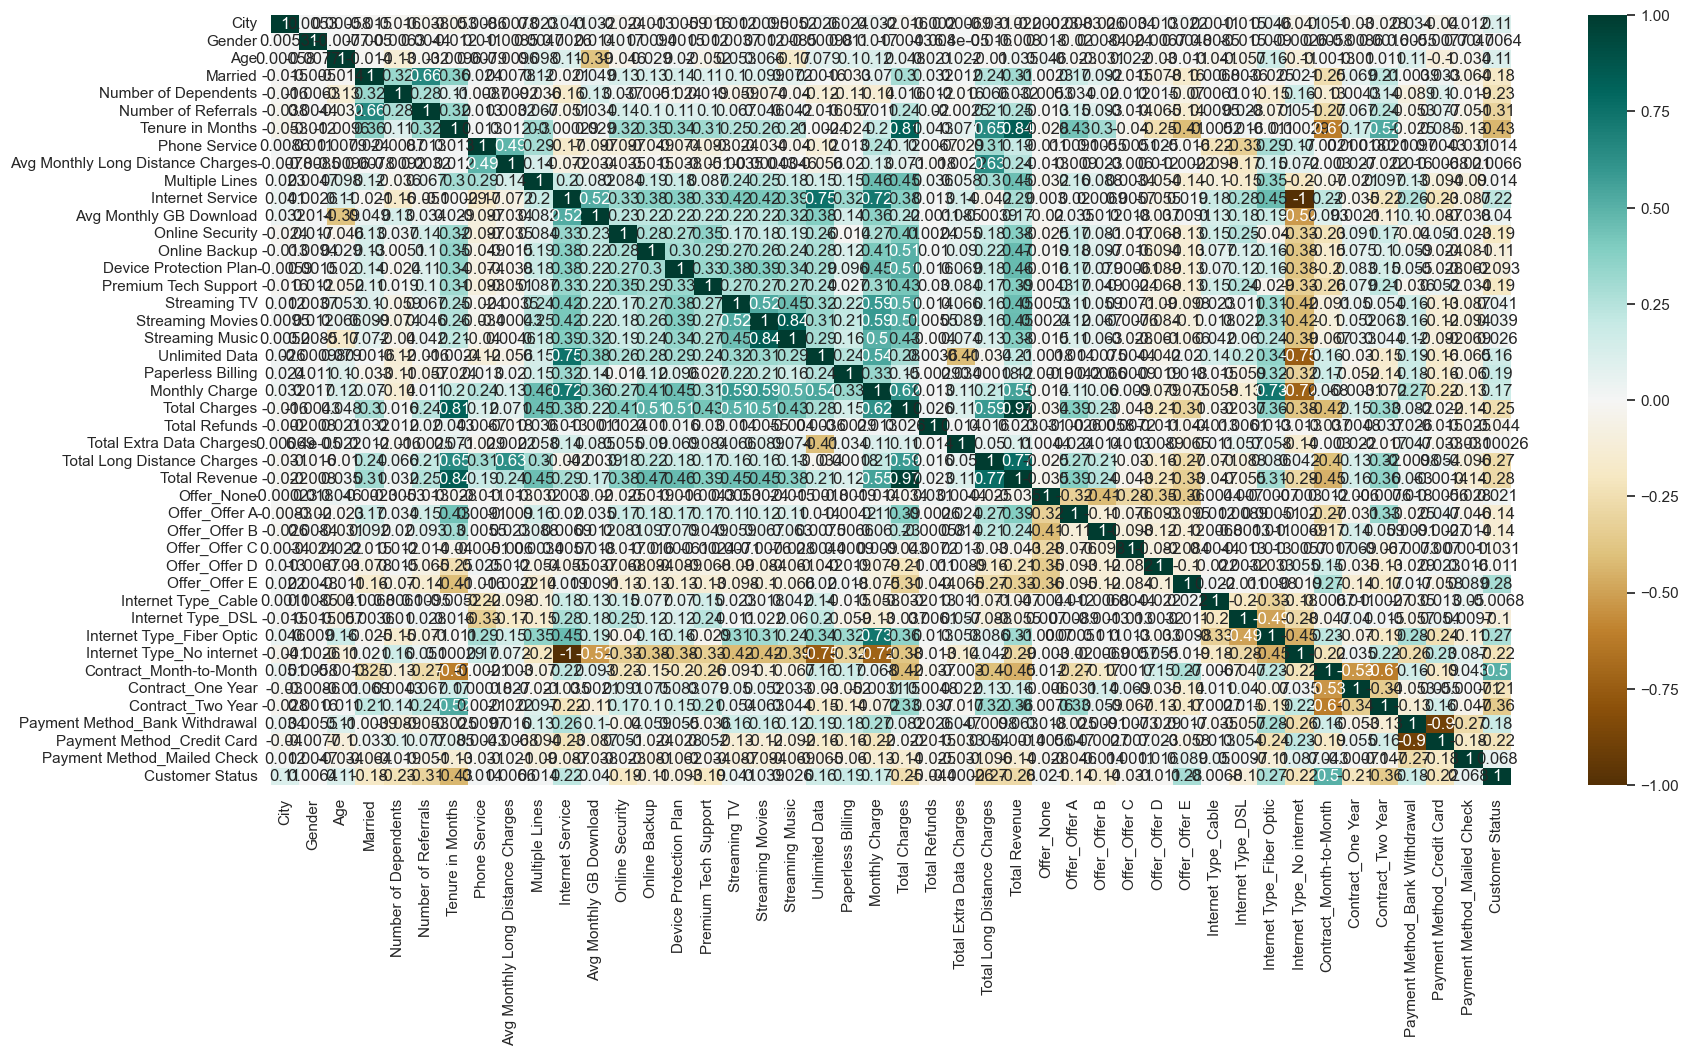

In [53]:
plt.figure(figsize=(20,10))
c= df_encoded2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Machine Learning 
The following section will train three seperate machine learning models to see if we can accurately predict if a customer will churn or not.

## Support Vector Machine

The first model that will be trained is the Support Vector Machine (SVM) learning algorithm. SVM can be used for both classification and regression problems, but for this dataset we will using classification, as that is the problem of predicting the status of customers.\
The most important thing to note about this model is that it requires thoughtful preproccessing methods to get a good prediction. It is very sensitive to the scaling of the data. This is due to the fact that SVM is prone to low accuracies when dealing with data that is not scaled in the same way. For this reason, the data will be preprocessed using the MinMaxScaler method. This scaling technique will shift all of the values so that they are between 0 and 1 (Müller and Guido, 2017).

In [54]:
# split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded2, y_encoded2, test_size = 0.25, random_state = 101)

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

Before the dataset is preprocessed, the model will be run on the unscaled data. This is done to highlight the improvement in accuracy that will result froms caling the data. It can be seen the results of the initial model are consistent, but the accuracy is much lower than expected.

In [56]:
#displaying accuracy of test and training set before scaling
print("Accuracy on test set : {: .2f}".format(svc.score(X_test, y_test)))
print("Accuracy on training set : {: .2f}".format(svc.score(X_train, y_train)))

Accuracy on test set :  0.79
Accuracy on training set :  0.76


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1174
           1       0.70      0.45      0.55       474

    accuracy                           0.79      1648
   macro avg       0.75      0.69      0.70      1648
weighted avg       0.78      0.79      0.77      1648



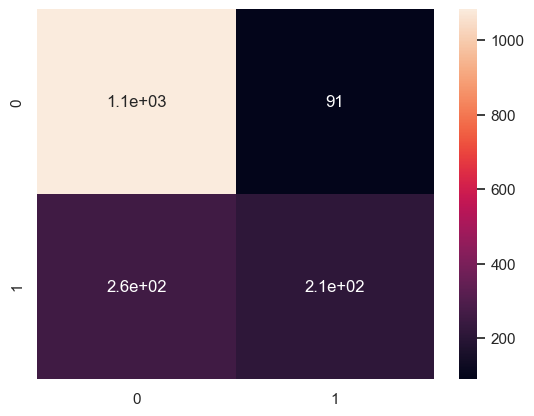

In [57]:
#now we will evaluate the models predictions, before scaling
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

Now Standard Scaling is applied to the dataset. This will shift the mean to 0 and the standard deviation to 1. The model will then be re-evaluated to increase its accuracy

In [58]:
from sklearn.preprocessing import StandardScaler
n_scaler = StandardScaler()

X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))

In [59]:
svc.fit(X_train_scaled, y_train)

SVC()

In [60]:
print("Accuracy on test set : {: .2f}".format(svc.score(X_test_scaled, y_test)))
print("Accuracy on training set : {: .2f}".format(svc.score(X_train_scaled, y_train)))

Accuracy on test set :  0.85
Accuracy on training set :  0.89


From the above results it can be seen that the accuracy of the model was significantly improved by applying scaling to the dataset.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1174
           1       0.76      0.72      0.74       474

    accuracy                           0.85      1648
   macro avg       0.83      0.81      0.82      1648
weighted avg       0.85      0.85      0.85      1648



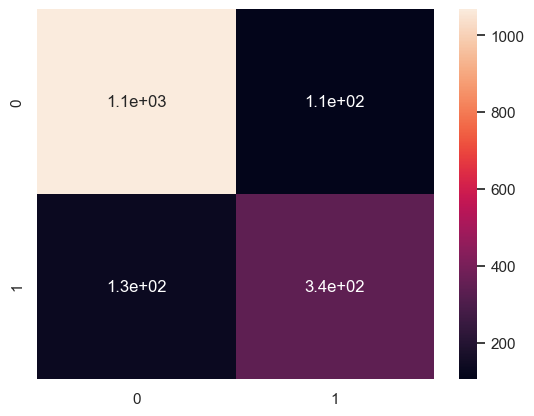

In [61]:
y_predict_scaled = svc.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

The model can further be improved by tuning the hyper parameters within the RBF kernel. From the code in the cell below it can be seen that the best results are from the following parameters: *C=100, gamma=0.001*\

The gamma parameter determines how far a single training sample reaches before it is considered close by. A small gamma value indicates a large radius for the kernel, which means that several points would be considered close by (Müller and Guido, 2017).\

The C parameter is a regulizer. It limits the importance or it's dual coefficent. As the C parameter increases, the model becomes less restricted. A small C value creates a very restricted model with data points having a very limited influence while a larger value allows misclassified points to have a stronger influence on the model and makes the decision line of the model alter to more accurately classify them (Müller and Guido, 2017).

These specific hyperparameters will now be used on the ML model to determine the new, refined accuracy.

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.776 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.763 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.718 total time=   0.8s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.725 total time=   0.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.721 total time=   0.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.723 total time=   0.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.836 total time=   0.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.809 total time=   0.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.794 total time=   0.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.811 total time=   0.9s
[CV 4/5] END ....C=1000, gam

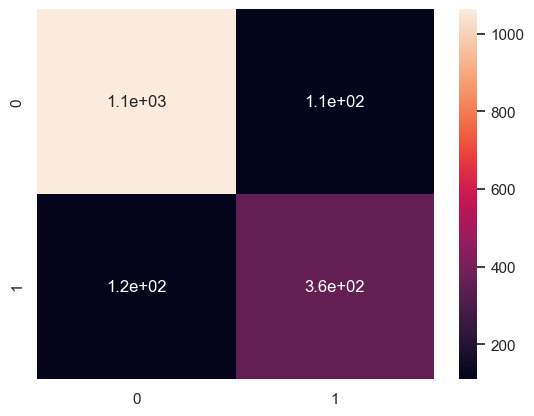

In [62]:
#searching for the best hyper parameters in the RBF kernel
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [63]:
svc2 = SVC(C=100, gamma=0.001)
svc2.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1174
           1       0.76      0.75      0.76       474

    accuracy                           0.86      1648
   macro avg       0.83      0.83      0.83      1648
weighted avg       0.86      0.86      0.86      1648



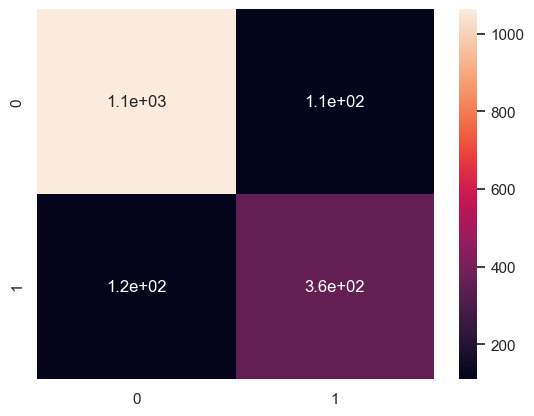

In [64]:
y_predict_scaled = svc2.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

As shown in the above confusion matrix, tuning the hyperparameters has increased accuracy predictions of the model, however these increases are much lower than those from scaling the data. As this is the highest accuracy that can be obtained by the model, it will be the final SVM model trained in this project. A K fold cross validation will be run on 3 different validation splits of the scaled datasets. This will be done to check the authenticity of the predictions made by the model.

In [65]:
#k fold cross validation
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = svc2 , X = X_train_scaled, y = y_train, cv = 5)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.84934277 0.85121457 0.86234818 0.84109312 0.87348178] 
 Mean Accuracy : 0.855496084459418 
Standard Deviation : 0.011261230290985183


In [66]:
cvs = cross_val_score(estimator = svc2 , X = X_train_scaled, y = y_train, cv = 10)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.84040404 0.86032389 0.84817814 0.8562753  0.87854251 0.86842105
 0.86234818 0.82186235 0.86234818 0.88866397] 
 Mean Accuracy : 0.8587367603157077 
Standard Deviation : 0.017954522545135104


In [67]:
cvs = cross_val_score(estimator = svc2 , X = X_train_scaled, y = y_train, cv = 20)
print(cvs, "\n Mean Accuracy :", cvs.mean(), "\nStandard Deviation :", cvs.std())

[0.86290323 0.82186235 0.8582996  0.86234818 0.82591093 0.87854251
 0.87854251 0.84210526 0.86639676 0.88259109 0.87449393 0.83805668
 0.85425101 0.87449393 0.8097166  0.82591093 0.86639676 0.86234818
 0.88259109 0.89473684] 
 Mean Accuracy : 0.8581249183753428 
Standard Deviation : 0.02292470142871198


## Method-2 Decision Trees / Random forest

## Decision Tree Classifier
The second model that will be used is the Decision Tree Classifier. As there is only one hyperparameter, and the dataset does not take long to model, the optimal value for the hyperparameter will be explored using two functions: max_depth_test and test_size_test.
The first function takes 5 parameters, a numerical variable ‘max’ and 4 variables for test & train datasets for the dependant and independent variables. The function then creates a loop to test the hyper parameter in a range of 1 to the maximum value and stops when it encounters a scenario where the increasing the hyperparameter did not increase the accuracy.
The second function then trains the model on a variety of training test sizes, ranging from 1% to 35% of the original dataset, using only the accuracy from the optimal hyperparameter setting. The results of this are illustrated in figure 9. From here it can be seen that the accuracy of the model varies between 85% and 86%, with a peak value of 86.36% at 5% testing size and 95% training size.


In [106]:
def max_depth_test(max,X_train, y_train,X_test,y_test):
    accuracy = []
    iteration = []
    last = 0
    
    for i in range(1,max):
        clf = DecisionTreeClassifier(max_depth = i, random_state = 0)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        if  last == metrics.accuracy_score(y_test, y_pred):
            break
        
        accuracy.append(metrics.accuracy_score(y_test, y_pred) )
        
        iteration.append(i)
        
        last = metrics.accuracy_score(y_test, y_pred)
        
    return accuracy, iteration
        
def test_size_test(size_list, X, y):
    y2 = []
    x2 = []
    s2 = []
    for i in size_list:
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 1)
        
        y1, x1 = max_depth_test(100,X_train, y_train,X_test,y_test)
        
        maxima = [ index for index, item in enumerate(y1) if item == max(y1)]
        
        x2.append(x1[maxima[0]])
        
        y2.append(y1[maxima[0]])
        s2.append(i)
        
    return x2,y2,s2
        

In [107]:
size_list = []
temp_var = 0
for i in range(35):
    temp_var += 0.01
    size_list.append(round(temp_var, 3))

    

x2,y2,s2 = test_size_test(size_list, X_encoded2, y_encoded2)

<function matplotlib.pyplot.show(close=None, block=None)>

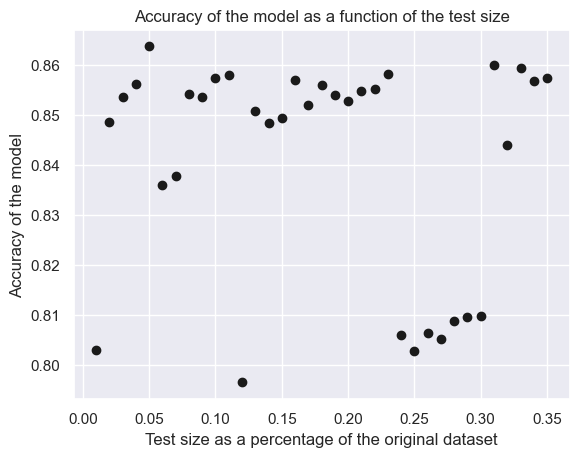

In [108]:
plt.plot(s2, y2, "ko")
plt.xlabel("Test size as a percentage of the original dataset")
plt.ylabel("Accuracy of the model")
plt.title("Accuracy of the model as a function of the test size")
plt.show

In [109]:
maxima = [ index for index, item in enumerate(y2) if item == max(y2)]
print("maximum accuracy we can obtain with this technique is: ", round( y2[maxima[0]]  , 7))
print("This is obtained by using a test size of: ", s2[maxima[0]])
print("and a maximum depth of: ", x2[maxima[0]])

maximum accuracy we can obtain with this technique is:  0.8636364
This is obtained by using a test size of:  0.05
and a maximum depth of:  8


[0.8547486  0.85346756 0.85682327 0.86577181 0.89149888 0.84899329
 0.86577181] 
 Mean Accuracy : 0.862439317896556 
Standard Deviation : 0.01319439551493985


<AxesSubplot:>

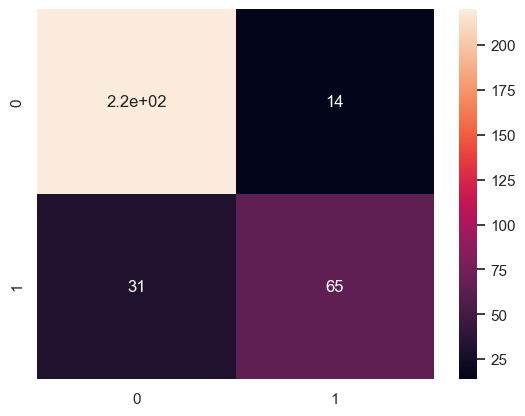

In [110]:
#cross validation
X_train, X_test, y_train, y_test = train_test_split(X_encoded2, y_encoded2, test_size = s2[maxima[0]], random_state = 1)
clf = DecisionTreeClassifier(max_depth = x2[maxima[0]], random_state = 0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

scores = cross_val_score(estimator=clf, X = X_train, y = y_train, cv=7, n_jobs=9)
print(scores, "\n Mean Accuracy :", scores.mean(), "\nStandard Deviation :", scores.std())

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       234
           1       0.82      0.68      0.74        96

    accuracy                           0.86       330
   macro avg       0.85      0.81      0.83       330
weighted avg       0.86      0.86      0.86       330



## Artificial Neural Networks

The final model used in this project will be ANN. ANN is a computational algorithm that works just like a brain, consisting of nodes which are analogous neurons in the brain. This model is excellent for pattern recognition and classification problems, which is why it was one of the models chosen for this project.

In [85]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import category_encoders as ce

import random

import tensorflow as tf
tf.random.set_seed(9)
np.random.seed(1)
random.seed(1)

from keras.models import Sequential
from keras.layers import Dense

### Splitting the data into training and testing set

For this model the data will be split into a training set consisting of 90% of the original dataset and the test set consisting of the remaining 10% of the dataset. It should also be noted that ANN has a tendancy to overfit, particularly with a smaller dataset like the one that will be used.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded2, y_encoded2, test_size = 0.1, random_state = 1)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5930, 43), (659, 43), (5930,), (659,))

### Data scaling

Similarly to the VSM model, the dataset will be scaled using the standard scalar by setting the mean to zero and standard deviation to 1.


ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [88]:
from sklearn.preprocessing import StandardScaler
n_scaler = StandardScaler()

X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))

4) Model building

This model will use activation Relu in hidden layers (default activation for hidden layers) and Sigmoid activation for the output layer. The target labels used to train a model with a sigmoid activation function in the output layer will have the values 0 or 1.

ref: https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

The number of neurons in input layer will be set up to the number of features (columns) in the training data.

Two hidden layers will be used, one with 60 and the other with 30 neurons. These values were chosen by experimenting with different combination of layers and featuresuntil a high accuracy was achived with minimal overfitting.

In [89]:
model = Sequential()

Adding the first hidden layer

In [90]:
model.add(Dense(60, activation = 'relu', input_dim = 43))

Adding the second hidden layer

In [91]:
model.add(Dense(30, activation = 'relu'))

Adding the output layer

In [92]:
model.add(Dense(1, activation = 'sigmoid'))

Compiling the model

In [93]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### Model Training and Evaluation

The model will now be trained using 20 epochs, or iterations. The number of epochs was chosen by experimenting to balance overfitting and accuracy. Increasing numberof epochs results in higher accuracy, but also higher overfitting and increased the generalisation error, which reduces the models performance on new datasets.

References:
https://link.springer.com/chapter/10.1007/978-3-319-73074-5_5
Generalization Error in Deep Learning
Daniel Jakubovitz, Raja Giryes & Miguel R. D. Rodrigues 
Chapter
First Online: 14 August 2019

https://wp.wwu.edu/machinelearning/2017/01/22/generalization-and-overfitting/

In [94]:
model.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
186/186 [==============================] - 1s 774us/step - loss: 0.4095 - accuracy: 0.8064
Epoch 2/20
186/186 [==============================] - 0s 692us/step - loss: 0.3348 - accuracy: 0.8524
Epoch 3/20
186/186 [==============================] - 0s 665us/step - loss: 0.3168 - accuracy: 0.8626
Epoch 4/20
186/186 [==============================] - 0s 689us/step - loss: 0.3050 - accuracy: 0.8661
Epoch 5/20
186/186 [==============================] - 0s 697us/step - loss: 0.2976 - accuracy: 0.8661
Epoch 6/20
186/186 [==============================] - 0s 682us/step - loss: 0.2890 - accuracy: 0.8717
Epoch 7/20
186/186 [==============================] - 0s 660us/step - loss: 0.2830 - accuracy: 0.8715
Epoch 8/20
186/186 [==============================] - 0s 660us/step - loss: 0.2741 - accuracy: 0.8803
Epoch 9/20
186/186 [==============================] - 0s 670us/step - loss: 0.2707 - accuracy: 0.8791
Epoch 10/20
186/186 [==============================] - 0s 651us/step - loss: 0.264

### Model evaluation

The training accuracy of this model is 92% while the testing accuracy is 82%. While both accuracies are high, it is preferable for them to be within 5% of each other. Since the percentage difference here is 10, it can be concluded that the model has a tendancy to overfit. 

In [95]:
scores = model.evaluate(X_train_scaled, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

186/186 [==============================] - 0s 557us/step - loss: 0.1968 - accuracy: 0.9201
Training Accuracy: 92.01%

21/21 [==============================] - 0s 650us/step - loss: 0.3823 - accuracy: 0.8316
Testing Accuracy: 83.16%



### Confusion matrix

The diagonal elements of Confusion matrix represent correct predictions. There were total 540 customers correctly predicted by the model:

410 customers who were correctly predicted as Stayed,
130 customers who were correctly predicted as Churned

The elements that are off-diagonal represent incorrect predictions. There were total 116 incorrect predictions:

56 customers were incorrectly predicted as Churned (while Actual they were Stayed customers),
60 customers were incorrectly predicted as Stayed (while Actual they were Churned customers).

21/21 [==============================] - 0s 600us/step


Text(47.25, 0.5, 'Actual')

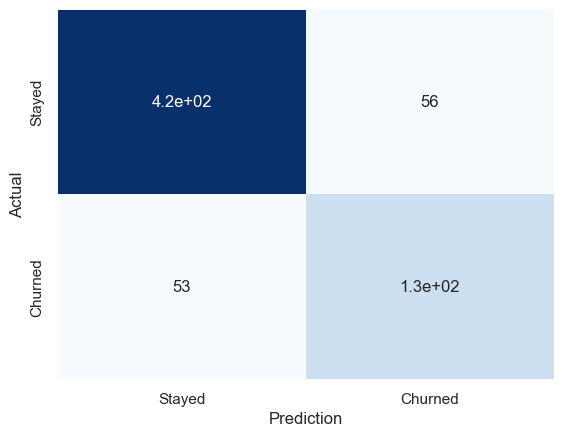

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict(X_test_scaled)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
ax = sns.heatmap(c_matrix, annot=True,                  
                 xticklabels=["Stayed","Churned"],                
                 yticklabels=["Stayed","Churned"],                  
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

ROC curve

For classification tasks, we should also look at the ROC curve to evaluate our model.

The ROC curve is a plot with the True Positive Rate (TPR) on the y axis and the False Positive Rate (FPR) on the x axis. The curve close to the top-left corner indicates good performance of the model. The curve closer to the 45-degree diagonal - the less accurate the test.

Source: https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/

Getting the predicted probabilities of each class using the predict() function

In [97]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test_scaled)

21/21 [==============================] - 0s 550us/step


Running the roc_curve function in order to get the corresponding false positive rate and true positive rate for the ROC curve:

In [98]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

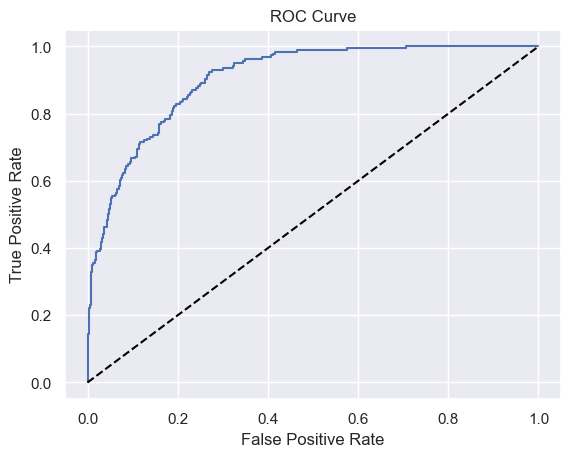

In [99]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ROC Curve visualisation confirms that the model performs well. This shows that our model is able to differentiate samples of different classes, making good predictions.

K-fold Cross-validation

K-Fold Cross Validation estimates the skill of machine learning model, showing average accuracy and variance for all possible resamples in the training and testing sets, according to parameter k. Parameter k specifies number of groups that a data sample is to be split into. We will calculate cross-validation for 3 training groups:

1) 5% (cv=20) 20-fold Cross-validation 2) 10% (cv=10) 10-fold Cross-validation 3) 20% (cv=5) 5-fold Cross-validation

https://machinelearningmastery.com/k-fold-cross-validation/ https://medium.datadriveninvestor.com/evaluating-ann-model-using-k-fold-cross-validation-with-python-cd4844351371

1) Cross-validation for 5% training split:

The average model accuracy is 84.6% and the average variance is 2.4%.

In [100]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 60, activation="relu",input_dim = 43))
    classifier.add(Dense(units = 30,activation="relu"))
    classifier.add(Dense(units = 1,activation="sigmoid"))
    classifier.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['accuracy'])
        
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 20 )
accuracies = cross_val_score(estimator=classifier, X = X_train_scaled, y = y_train, cv=20)

30/30 [==============================] - 0s 621us/step - loss: 0.3565 - accuracy: 0.8176


In [101]:
mean=accuracies.mean()
variance=accuracies.std()

print(mean)
print(variance)

0.8468821167945861
0.023657775150060574


2) Cross-validation for 10% training split:

The average model accuracy is 84.8% and the average variance is 1.3%.

In [102]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 60, activation="relu",input_dim = 43))
    classifier.add(Dense(units = 30,activation="relu"))
    classifier.add(Dense(units = 1,activation="sigmoid"))
    classifier.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['accuracy'])
        
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 20 )
accuracies = cross_val_score(estimator=classifier, X = X_train_scaled, y = y_train, cv=10)

60/60 [==============================] - 0s 627us/step - loss: 0.3496 - accuracy: 0.8314


In [103]:
mean=accuracies.mean()
variance=accuracies.std()

print(mean)
print(variance)

0.8478920698165894
0.013316749323685201


3) Cross-validation for 20% training split:

The average model accuracy is 84.5% and the average variance is 1.5%.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 60, activation="relu",input_dim = 43))
    classifier.add(Dense(units = 30,activation="relu"))
    classifier.add(Dense(units = 1,activation="sigmoid"))
    classifier.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['accuracy'])
        
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 20 )
accuracies = cross_val_score(estimator=classifier, X = X_train_scaled, y = y_train, cv=5)

In [ ]:
mean=accuracies.mean()
variance=accuracies.std()

print(mean)
print(variance)

From cross-validation above, we can see that 10% training split gives the best results for the highest Average accuracy (84.8%) and the lowest Average variance (1.3%)

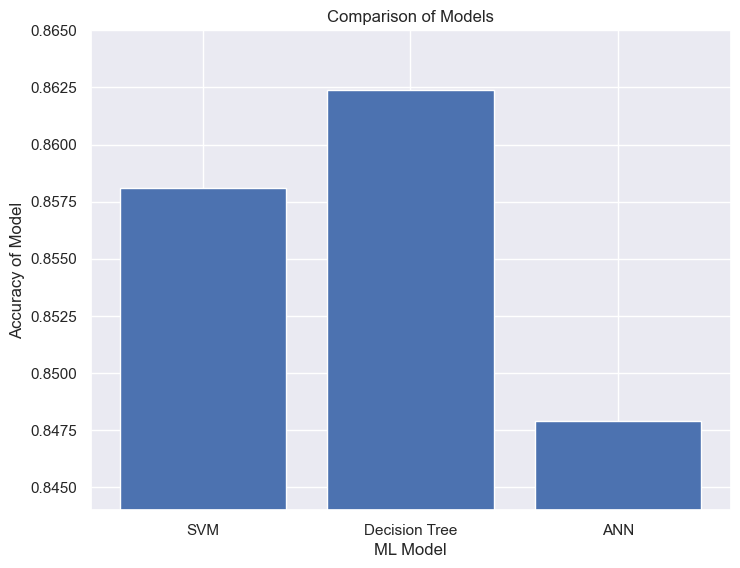

In [3]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['SVM', 'Decision Tree', 'ANN']
students = [0.8581, 0.8624, 0.8479]
ax.bar(langs,students)
plt.ylim(0.844,0.865)
plt.xlabel("ML Model")
plt.ylabel("Accuracy of Model")
plt.title("Comparison of Models")
plt.show()

In [4]:
print((0.8624-0.8479)*100)

1.4500000000000068
